<a href="https://colab.research.google.com/github/Arpan-000/Student-Training-Program-On-Al-ML/blob/main/Copy_of_AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [15]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-15-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [16]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [17]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [18]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [19]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [20]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [36]:

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [23]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [24]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [25]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16510349288486417


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [26]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

In [27]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 40/100)

In [ ]:

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy using random classifier is  0.16530509329299042
Validation accuracy of nearest neighbour is  0.33121533030761474


In [ ]:
testpred = NN(traindata, trainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.3187741312741313


In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 20/100)

In [ ]:
valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy using random classifier is  0.16044635452009348
Validation accuracy of nearest neighbour is  0.3078489029631305


In [ ]:
testpred = NN(traindata, trainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.29126447876447875


# ANSWERS
1) From the above illustrations we come to a conclusion that as the percentage of the validation set is decreased the validation and the test accuracy of the nearest neighbour decreases.  



*    The  accuracy of validation set with decreased  Validation datapoints can't really be trusted upon since it's a small pie of a larger cake.
*   Moving on with the results of test accuracy it's because of Overfitting issue that the model's accuracy goes on deteriorating.













In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 99/100)

In [ ]:
valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy using random classifier is  0.1875
Validation accuracy of nearest neighbour is  0.3068181818181818


In [ ]:
testpred = NN(traindata, trainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.3511100386100386


In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 99.2/100)

In [ ]:
valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy using random classifier is  0.18518518518518517
Validation accuracy of nearest neighbour is  0.31851851851851853


In [ ]:
testpred = NN(traindata, trainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.3484555984555985


In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 99.6/100)

In [ ]:

valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.31851851851851853


In [ ]:
testpred = NN(traindata, trainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.3484555984555985


# Continuation Of Answers

1) As we notice in the above examples that after a given point the validation accuracy increases but the same isn't reciprocated in the case of test accuracy .

2) At 99% Validation datapoint we get the maximum test accuracy.Though the value keeps changing for each time we execute but the values tend to diminish after 99%.

In [31]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.01/100)


In [32]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.056808536437492424


In [33]:
testpred = NN(traindata, trainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.052847490347490346


In [ ]:
# Assuming you have defined your split, NN, and Accuracy functions

def train_and_val(validation_percent):
    # Split the data into training and validation sets
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, validation_percent / 100)

    # Train the model
    trainpred = NN(traindata, trainlabel, traindata)  # Replace traindata with your actual training data

    # Validate the model on the validation set
    valpred = NN(traindata, trainlabel, valdata)

    # Calculate validation accuracy
    valAccuracy = Accuracy(vallabel, valpred)

    return valAccuracy

# Define a list to store validation accuracies
validation_accuracies = []

# Loop through different percentages of validation data
for i in range(1, 100):
    validation_percent = i
    val_accuracy = train_and_val(validation_percent)
    validation_accuracies.append(val_accuracy)
    print(val_accuracy)

# You can analyze the validation accuracies as needed


0.260611257426349
0.2811804008908686
0.278872006502845
0.28247266291637696
0.2732669475296821
0.2820595645713547
0.2860960823935858
0.29199815898481163
0.30078151092111416
0.2893951722267426
0.2900784180020457
0.3033645890788748
0.2980889942809318
0.2944863037814238
0.2990059357791604
0.3052532968220797
0.31341320864991234
0.2996894409937888
0.3027802557240559
0.3097176774979073
0.3105718441399372
0.31097418298104673
0.30942445476734115
0.31230006397952653
0.3162559973977393
0.3161951619516195
0.3159730874657364
0.3178952677145499
0.32152309399812173
0.31715126341294564
0.3186036235086169
0.3160192444761226
0.3181777094820573
0.31993392070484583
0.3197101987739179
0.3210862619808307
0.318893830980468
0.32131308182263596
0.3202970297029703
0.31677825522134506
0.32854061826024444
0.32739350485027413
0.3244016098284262
0.3195975596703414
0.3277943945939958
0.3278557571607897
0.3260571428571429
0.3283478260869565
0.33099011080662455
0.33645435505728716
0.32326133100262205
0.328323993886907

In [ ]:
# Define a list to store test accuracies
test_accuracies = []

# Loop through different percentages of test data
for i in range(1, 100):
    test_percent = i
    traindata, trainlabel, testdata, testlabel = split(alltraindata, alltrainlabel, (100 - test_percent) / 100)

    # Train the model
    trainpred = NN(traindata, trainlabel, traindata)  # Replace traindata with your actual training data

    # Test the model on the test set
    testpred = NN(traindata, trainlabel, testdata)

    # Calculate test accuracy
    test_accuracy = Accuracy(testlabel, testpred)

    test_accuracies.append(test_accuracy)

    print(test_accuracy)

# You can analyze the test accuracies as needed


0.3273809523809524
0.3515151515151515
0.3587174348697395
0.3607305936073059
0.3588456712672522
0.34536585365853656
0.34188817598533455
0.3538102643856921
0.3725992317541613
0.3471223021582734
0.337116912599319
0.35923309788092833
0.3510436432637571
0.34024179620034545
0.3416173570019724
0.3462757527733756
0.3341654778887304
0.34468937875751504
0.3494589433481859
0.34332425068119893
0.34615384615384615
0.33873626373626375
0.34839224023385595
0.3397633744855967
0.34328720563243503
0.3298847872090289
0.3417163026693139
0.3443680137575236
0.34395973154362414
0.3341503267973856
0.34146341463414637
0.3316831683168317
0.3374324576113285
0.33932704290546556
0.3322288106034182
0.3262041091276524
0.33579572828007065
0.3331711273317113
0.32144540455616655
0.3374659812518899
0.33140139693862386
0.33437945791726104
0.33314326443335707
0.3327900027166531
0.33067135896047645
0.3411949685534591
0.32499032382918336
0.3284232099397976
0.31899147014550927
0.32095938290948534
0.32629218786877506
0.3301643

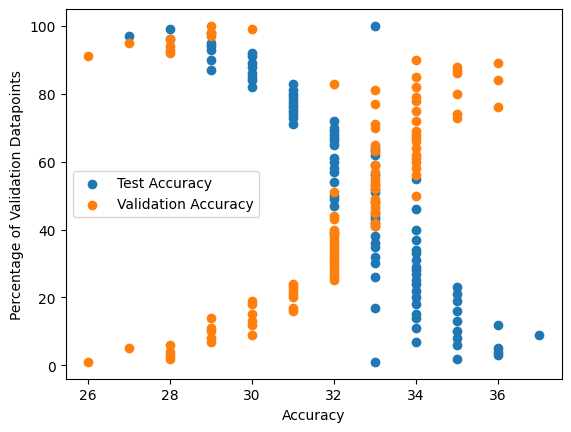

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("N1N.csv")


plt.scatter('Test Acc','Validation datapoints',data =df,label = 'Test Accuracy')
plt.scatter('Validation acc','Validation datapoints',data =df,label ='Validation Accuracy')

plt.xlabel('Accuracy')
plt.ylabel('Percentage of Validation Datapoints')
plt.legend()


plt.show()


3) refering the plot it looks like the ideal division of 15-20% of validation holds good.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [34]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [35]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3382721615409337
test accuracy is  0.34917953667953666


In [38]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 85/100, 10, classifier=NN))
testpred = NN(traindata, trainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3442041108431059
test accuracy is  0.3421814671814672


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


# ANSWERS
1) When we train a machine learning model using data, we often see that the results can change slightly from one attempt to another. This means that the accuracy we get on our test and validation data may not always be the same. To make our accuracy measurements more reliable, we can run the training process multiple times and then calculate an average of the validation accuracy across all these runs. This helps us get a more consistent and dependable estimate of how well our model is performing because it considers the different results we get each time we train the model. By doing this, we reduce the impact of random variations and can trust our assessment of the model's performance better.

2) If the average validation accuracy is high, it's a good sign that the model will probably do well on the test data too. Usually, when you see a high validation accuracy, it means the model is quite reliable. But keep in mind that the test accuracy might be a bit lower than the validation accuracy. However, big changes in accuracy are unlikely unless the test data is very different from the data used to train the model, with very different values or patterns.

In [42]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)
def getAccuracyDetails(iterationVal):
  accValData = []
  accTestData = []
  iterations = []
  for i in range(10, iterationVal, 10):
    print('Predicting for Iteration ', i)
    avgValAccuracy = AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier = NN)
    testPred = NN(alltraindata, alltrainlabel, testdata)
    avgTestAccuracy = Accuracy(testlabel, testPred)
    iterations.append(i)
    accValData.append(avgValAccuracy)
    accTestData.append(avgTestAccuracy)
  return iterations, accValData, accTestData

In [43]:

iterations, accValData, accTestData = getAccuracyDetails(51)


Predicting for Iteration  10
Predicting for Iteration  20
Predicting for Iteration  30
Predicting for Iteration  40
Predicting for Iteration  50


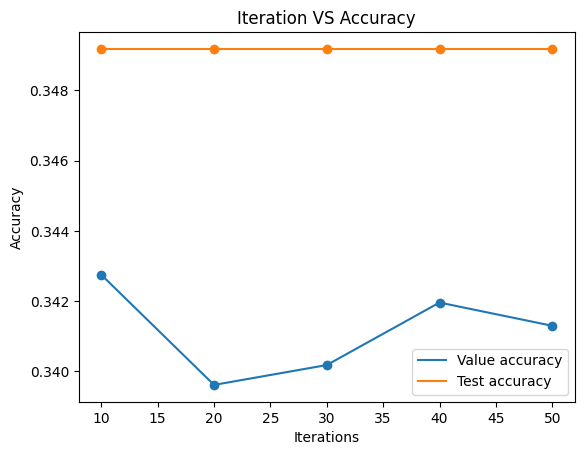

In [44]:
plt.scatter(iterations, accValData)
plt.plot(iterations, accValData, label = "Value accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.scatter(iterations, accTestData)
plt.plot(iterations, accTestData, label = "Test accuracy")
plt.title("Iteration VS Accuracy")
plt.legend()

plt.show()

4) The model's effectiveness, or its ability to make accurate predictions, tends to improve as we increase the number of iterations during training. However, there's a point where increasing iterations can lead to overfitting, where the model becomes too specialized for the training data and doesn't generalize well to new, unseen data. To strike a balance, it's essential to find the optimal number of iterations that works best for a specific model. This optimal number of iterations can vary from one model to another.